# Preparation

In [26]:
import pandas as pd
import numpy as np

df_name = 'laml'  #'dlbc'
df_expr = pd.read_csv(f'{df_name}/expr.csv',index_col=0)
df_prom = pd.read_csv(f'{df_name}/prom.csv',index_col=0)
df_cnv = pd.read_csv(f'{df_name}/cnv.csv',index_col=0)
df_snv = pd.read_csv(f'{df_name}/snv.csv',index_col=0)

# for lm and nlm results together
all_groups = {} 

In [27]:
df_expr

,TCGA-AB-2910-03A,TCGA-AB-2871-03A,TCGA-AB-2893-03A,TCGA-AB-2873-03A,TCGA-AB-2936-03A,TCGA-AB-2915-03A,TCGA-AB-2901-03A,TCGA-AB-2885-03A,TCGA-AB-2927-03A,TCGA-AB-2935-03A,TCGA-AB-2919-03A,TCGA-AB-2942-03A,TCGA-AB-2912-03A,TCGA-AB-2934-03A,TCGA-AB-2883-03A,TCGA-AB-2956-03A,TCGA-AB-2939-03A,TCGA-AB-2874-03A,TCGA-AB-2959-03A,TCGA-AB-2937-03A,TCGA-AB-2916-03A,TCGA-AB-2917-03A,TCGA-AB-2872-03A,TCGA-AB-2911-03A,TCGA-AB-2884-03A,...,TCGA-AB-2882-03A,TCGA-AB-2914-03A,TCGA-AB-2890-03A,TCGA-AB-2908-03A,TCGA-AB-2869-03A,TCGA-AB-2924-03A,TCGA-AB-2878-03A,TCGA-AB-2940-03A,TCGA-AB-2938-03A,TCGA-AB-2941-03A,TCGA-AB-2929-03A,TCGA-AB-2921-03A,TCGA-AB-2925-03A,TCGA-AB-2886-03A,TCGA-AB-2880-03A,TCGA-AB-2913-03A,TCGA-AB-2943-03A,TCGA-AB-2881-03A,TCGA-AB-2950-03A,TCGA-AB-2897-03A,TCGA-AB-2895-03A,TCGA-AB-2933-03A,TCGA-AB-2944-03A,TCGA-AB-2877-03A,TCGA-AB-2875-03A
AURKAIP1,10.353147,8.487840,10.252665,9.008429,8.679480,9.426265,8.625709,8.724514,9.451211,9.411511,8.854868,8.894818,7.864186,9.605480,8.451211,10.052568,8.888743,8.417853,7.539159,9.068778,7.994353,7.700440,9.005625,8.596190,9.247928,...,9.197217,7.707359,8.640245,9.645658,8.636625,8.927778,9.116344,9.228819,8.918863,9.076816,8.870365,9.677720,10.200899,9.381543,8.933691,7.531381,9.113742,9.184875,8.778077,8.939579,7.960002,8.392317,8.784635,8.573647,9.319672
GNB1,14.142107,12.998943,14.354043,13.493480,13.498351,14.074141,13.568312,13.577547,13.432933,13.299351,13.367688,13.657542,13.410716,13.579787,12.238106,13.833977,14.051719,13.498101,13.096386,14.039862,13.271901,13.320801,13.015067,13.069618,13.714568,...,13.876421,13.333295,13.303067,13.612293,13.207319,13.902564,13.907360,13.362766,13.622509,13.872290,13.650266,14.209758,13.659327,13.768391,13.700440,12.773139,13.907736,13.782486,13.760408,12.970106,13.010178,13.373001,13.451340,13.292034,13.989927
PRDM16,1.000000,11.080818,1.000000,4.459432,4.087463,2.000000,3.321928,11.464546,3.321928,9.103288,5.459432,1.584963,2.000000,10.543998,2.321928,1.000000,2.321928,2.000000,3.807355,1.000000,0.000000,6.672425,2.807355,4.584963,11.075479,...,8.027906,2.584963,1.584963,10.181152,10.802516,10.414685,9.888743,3.000000,5.321928,1.000000,5.357552,11.814182,9.865733,2.584963,1.584963,10.733863,11.352595,2.584963,1.584963,1.584963,11.954560,6.303781,6.392317,3.584963,1.584963
RNF207,5.727920,7.357552,7.426265,5.643856,5.754888,6.357552,6.942515,5.523562,6.614710,9.430453,5.954196,4.321928,6.044394,5.392317,7.118941,9.377211,3.584963,6.044394,4.906891,5.727920,5.554589,4.523562,5.321928,7.118941,8.209453,...,8.219169,4.807355,6.247928,6.000000,6.700440,6.857981,6.658211,5.700440,6.714246,9.368506,6.988685,6.149747,6.392317,4.087463,5.832890,4.906891,6.807355,5.554589,5.584963,5.169925,5.672425,3.807355,6.754888,7.087463,5.857981
GPR153,11.363040,6.954196,8.483816,7.000000,5.882643,5.954196,6.918863,3.807355,6.629357,7.748193,9.335390,4.584963,7.636625,6.303781,7.189825,8.909893,4.643856,4.321928,5.426265,10.833681,6.569856,4.247928,10.156083,6.754888,6.266787,...,8.022368,5.129283,6.870365,6.228819,8.954196,6.832890,5.672425,6.507795,6.754888,9.649256,5.044394,6.686501,8.400879,9.791163,5.129283,6.523562,6.658211,5.832890,10.126704,10.578373,6.087463,5.000000,5.727920,9.525521,9.652845
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
FLNA,17.962529,16.106706,16.621866,15.886816,15.270587,15.915202,15.175394,15.922329,14.487777,15.682995,15.046016,14.825158,14.643236,15.809869,14.245850,16.131978,16.175647,16.248576,13.876709,15.656955,15.406205,14.700386,15.375345,15.477727,15.990503,...,17.100724,14.120319,15.524572,14.622795,15.181308,16.516470,14.317201,15.347552,16.102222,15.925184,16.023516,16.082336,16.414355,15.012755,15.951262,14.367210,15.179482,15.646981,14.355970,15.220643,15.208196,15.032691,15.685953,14.648301,16.041873
G6PD,12.130249,10.688250,12.299208,12.829525,11.11113

## Drop genes with no expression

In [28]:
pd.set_option('display.max_columns', 50)
drop_column_names = df_expr[(df_expr<=0).all(axis=1)].axes[0]
print(drop_column_names)
df_expr = df_expr.drop(drop_column_names)
df_prom = df_prom.drop(drop_column_names)
df_cnv = df_cnv.drop(drop_column_names)
df_snv = df_snv.drop(drop_column_names)
gene_count = df_expr.shape[0]
df_expr

Index(['PCDHA1', 'SERINC4', 'CST11'], dtype='object')


,TCGA-AB-2910-03A,TCGA-AB-2871-03A,TCGA-AB-2893-03A,TCGA-AB-2873-03A,TCGA-AB-2936-03A,TCGA-AB-2915-03A,TCGA-AB-2901-03A,TCGA-AB-2885-03A,TCGA-AB-2927-03A,TCGA-AB-2935-03A,TCGA-AB-2919-03A,TCGA-AB-2942-03A,TCGA-AB-2912-03A,TCGA-AB-2934-03A,TCGA-AB-2883-03A,TCGA-AB-2956-03A,TCGA-AB-2939-03A,TCGA-AB-2874-03A,TCGA-AB-2959-03A,TCGA-AB-2937-03A,TCGA-AB-2916-03A,TCGA-AB-2917-03A,TCGA-AB-2872-03A,TCGA-AB-2911-03A,TCGA-AB-2884-03A,...,TCGA-AB-2882-03A,TCGA-AB-2914-03A,TCGA-AB-2890-03A,TCGA-AB-2908-03A,TCGA-AB-2869-03A,TCGA-AB-2924-03A,TCGA-AB-2878-03A,TCGA-AB-2940-03A,TCGA-AB-2938-03A,TCGA-AB-2941-03A,TCGA-AB-2929-03A,TCGA-AB-2921-03A,TCGA-AB-2925-03A,TCGA-AB-2886-03A,TCGA-AB-2880-03A,TCGA-AB-2913-03A,TCGA-AB-2943-03A,TCGA-AB-2881-03A,TCGA-AB-2950-03A,TCGA-AB-2897-03A,TCGA-AB-2895-03A,TCGA-AB-2933-03A,TCGA-AB-2944-03A,TCGA-AB-2877-03A,TCGA-AB-2875-03A
AURKAIP1,10.353147,8.487840,10.252665,9.008429,8.679480,9.426265,8.625709,8.724514,9.451211,9.411511,8.854868,8.894818,7.864186,9.605480,8.451211,10.052568,8.888743,8.417853,7.539159,9.068778,7.994353,7.700440,9.005625,8.596190,9.247928,...,9.197217,7.707359,8.640245,9.645658,8.636625,8.927778,9.116344,9.228819,8.918863,9.076816,8.870365,9.677720,10.200899,9.381543,8.933691,7.531381,9.113742,9.184875,8.778077,8.939579,7.960002,8.392317,8.784635,8.573647,9.319672
GNB1,14.142107,12.998943,14.354043,13.493480,13.498351,14.074141,13.568312,13.577547,13.432933,13.299351,13.367688,13.657542,13.410716,13.579787,12.238106,13.833977,14.051719,13.498101,13.096386,14.039862,13.271901,13.320801,13.015067,13.069618,13.714568,...,13.876421,13.333295,13.303067,13.612293,13.207319,13.902564,13.907360,13.362766,13.622509,13.872290,13.650266,14.209758,13.659327,13.768391,13.700440,12.773139,13.907736,13.782486,13.760408,12.970106,13.010178,13.373001,13.451340,13.292034,13.989927
PRDM16,1.000000,11.080818,1.000000,4.459432,4.087463,2.000000,3.321928,11.464546,3.321928,9.103288,5.459432,1.584963,2.000000,10.543998,2.321928,1.000000,2.321928,2.000000,3.807355,1.000000,0.000000,6.672425,2.807355,4.584963,11.075479,...,8.027906,2.584963,1.584963,10.181152,10.802516,10.414685,9.888743,3.000000,5.321928,1.000000,5.357552,11.814182,9.865733,2.584963,1.584963,10.733863,11.352595,2.584963,1.584963,1.584963,11.954560,6.303781,6.392317,3.584963,1.584963
RNF207,5.727920,7.357552,7.426265,5.643856,5.754888,6.357552,6.942515,5.523562,6.614710,9.430453,5.954196,4.321928,6.044394,5.392317,7.118941,9.377211,3.584963,6.044394,4.906891,5.727920,5.554589,4.523562,5.321928,7.118941,8.209453,...,8.219169,4.807355,6.247928,6.000000,6.700440,6.857981,6.658211,5.700440,6.714246,9.368506,6.988685,6.149747,6.392317,4.087463,5.832890,4.906891,6.807355,5.554589,5.584963,5.169925,5.672425,3.807355,6.754888,7.087463,5.857981
GPR153,11.363040,6.954196,8.483816,7.000000,5.882643,5.954196,6.918863,3.807355,6.629357,7.748193,9.335390,4.584963,7.636625,6.303781,7.189825,8.909893,4.643856,4.321928,5.426265,10.833681,6.569856,4.247928,10.156083,6.754888,6.266787,...,8.022368,5.129283,6.870365,6.228819,8.954196,6.832890,5.672425,6.507795,6.754888,9.649256,5.044394,6.686501,8.400879,9.791163,5.129283,6.523562,6.658211,5.832890,10.126704,10.578373,6.087463,5.000000,5.727920,9.525521,9.652845
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
FLNA,17.962529,16.106706,16.621866,15.886816,15.270587,15.915202,15.175394,15.922329,14.487777,15.682995,15.046016,14.825158,14.643236,15.809869,14.245850,16.131978,16.175647,16.248576,13.876709,15.656955,15.406205,14.700386,15.375345,15.477727,15.990503,...,17.100724,14.120319,15.524572,14.622795,15.181308,16.516470,14.317201,15.347552,16.102222,15.925184,16.023516,16.082336,16.414355,15.012755,15.951262,14.367210,15.179482,15.646981,14.355970,15.220643,15.208196,15.032691,15.685953,14.648301,16.041873
G6PD,12.130249,10.688250,12.299208,12.829525,11.11113

In [29]:
#any sample in gene has snv >=1
len(df_snv[(df_snv>=1).any(axis=1)].axes[0])

182

## IDA (graphics+stats)

(array([ 4.,  3.,  0., 10., 12., 12.,  7.,  3.,  1.,  3.]),
 array([ 7.53138146,  7.813558  ,  8.09573453,  8.37791107,  8.66008761,
         8.94226414,  9.22444068,  9.50661722,  9.78879375, 10.07097029,
        10.35314683]),
 <BarContainer object of 10 artists>)

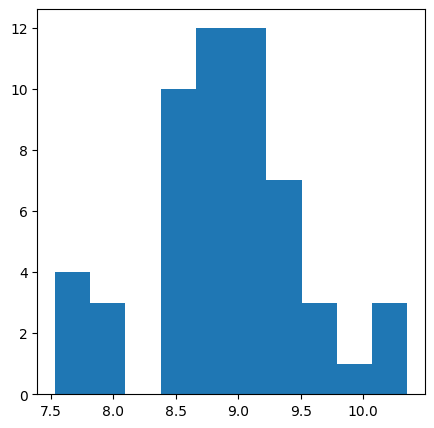

In [30]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize = (5,5))
plt.hist(df_expr.iloc[0,:])

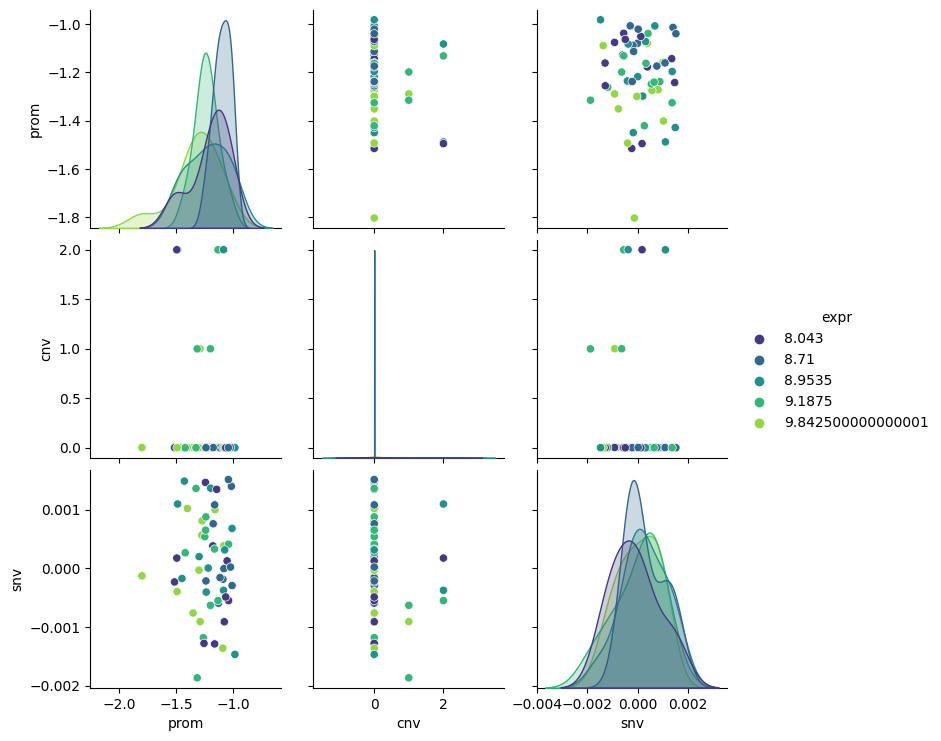

In [31]:
import seaborn as sns
gene_index = 0
subset = np.array([df_expr.values[gene_index,:],df_prom.values[gene_index,:],df_cnv.values[gene_index,:],df_snv.values[gene_index,:]]).T
subset = pd.DataFrame(subset)
subset.columns = ['expr','prom','cnv','snv']
subset['expr'] = pd.qcut(subset['expr'], 5, retbins=False)
subset['expr'] = subset['expr'].apply(lambda x: x.mid)

sns.pairplot(data=subset, hue='expr', palette="viridis")

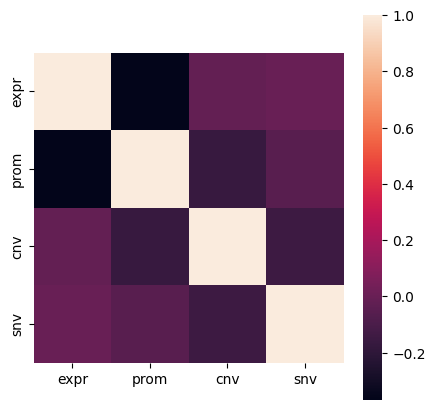

In [32]:
subset = np.array([df_expr.values[gene_index,:],df_prom.values[gene_index,:],df_cnv.values[gene_index,:],df_snv.values[gene_index,:]]).T
subset = pd.DataFrame(subset)
subset.columns = ['expr','prom','cnv','snv']
C_mat = subset.corr() 
fig = plt.figure(figsize = (5,5))

sns.heatmap(C_mat, square = True)
plt.show()

## Example 1st gene lm

eval_env: 1
eval_env: 1
eval_env: 1
eval_env: 1
aic= 103.71803649854054


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.144
Model:                            OLS   Adj. R-squared:                  0.093
Method:                 Least Squares   F-statistic:                     2.850
Date:                Fri, 28 Apr 2023   Prob (F-statistic):             0.0464
Time:                        14:41:26   Log-Likelihood:                -47.859
No. Observations:                  55   AIC:                             103.7
Df Residuals:                      51   BIC:                             111.7
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.1325      0.617     11.552      0.000       5.893       8.372
x1            -1.4835      0.508     -2.920      0.005      -2.503      -0.464
x2            -0.0992      0.150     -0.659      0.513      -0.401       0.203
x3           -27.7729     97.115     -0.286      0.776    -222.739     167.194
==============================================================================
Omnibus:                        3.004   Durbin-Watson:                   2.165
Prob(Omnibus):                  0.223   Jarque-Bera (JB):                2.546
Skew:                          -0.527   Prob(JB):                        0.280
Kurtosis:                       2.988   Cond. No.                     1.91e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.91e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

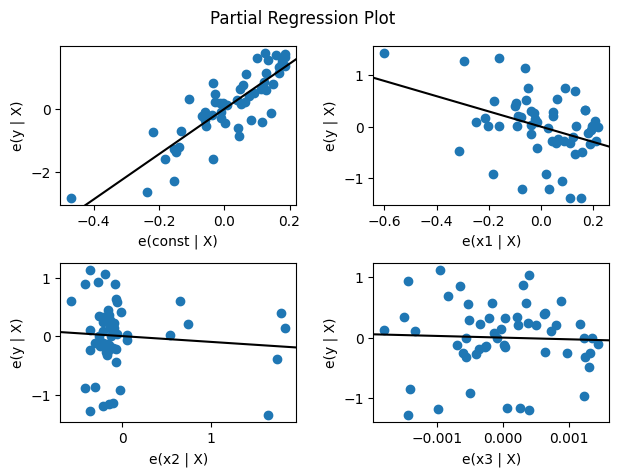

In [33]:
import statsmodels.api as sm
gene_idx=0
X = np.array([df_prom.values[gene_idx,:],df_cnv.values[gene_idx,:],df_snv.values[gene_idx,:]]).T
y = df_expr.values[gene_idx,:]

X2 = sm.add_constant(X)
est = sm.OLS(y, X2)
res = est.fit()
fig = sm.graphics.plot_partregress_grid(res)
fig.tight_layout(pad=1.0)
print("aic=",res.aic)
res.summary()

## Example 1st gene glm gauss log link

eval_env: 1
eval_env: 1
eval_env: 1
eval_env: 1
aic= 103.71438559536051


<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                   55
Model:                            GLM   Df Residuals:                       51
Model Family:                Gaussian   Df Model:                            3
Link Function:                    Log   Scale:                         0.35884
Method:                          IRLS   Log-Likelihood:                -47.857
Date:                Fri, 28 Apr 2023   Deviance:                       18.301
Time:                        14:41:26   Pearson chi2:                     18.3
No. Iterations:                     5   Pseudo R-squ. (CS):             0.1466
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.9874      0.068     29.383      0.000       1.855       2.120
x1            -0.1665      0.055     -3.016      0.003      -0.275      -0.058
x2            -0.0120      0.017     -0.711      0.477      -0.045       0.021
x3            -3.1729     10.879     -0.292      0.771     -24.496      18.150
==============================================================================
"""

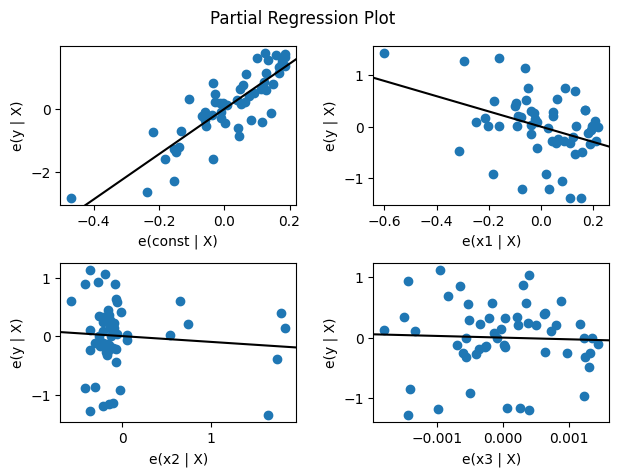

In [34]:
est = sm.GLM(y, X2, family=sm.families.Gaussian(sm.genmod.families.links.Log()))
res = est.fit()
fig = sm.graphics.plot_partregress_grid(res)
fig.tight_layout(pad=1.0)
print("aic=",res.aic)
res.summary()

## Example 1st gene glm gauss inverse power link

eval_env: 1
eval_env: 1
eval_env: 1
eval_env: 1
aic= 103.55153522240366


<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                   55
Model:                            GLM   Df Residuals:                       51
Model Family:                Gaussian   Df Model:                            3
Link Function:          inverse_power   Scale:                         0.35778
Method:                          IRLS   Log-Likelihood:                -47.776
Date:                Fri, 28 Apr 2023   Deviance:                       18.247
Time:                        14:41:27   Pearson chi2:                     18.2
No. Iterations:                     6   Pseudo R-squ. (CS):             0.1493
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1346      0.007     18.263      0.000       0.120       0.149
x1             0.0187      0.006      3.127      0.002       0.007       0.030
x2             0.0014      0.002      0.759      0.448      -0.002       0.005
x3             0.3590      1.218      0.295      0.768      -2.028       2.746
==============================================================================
"""

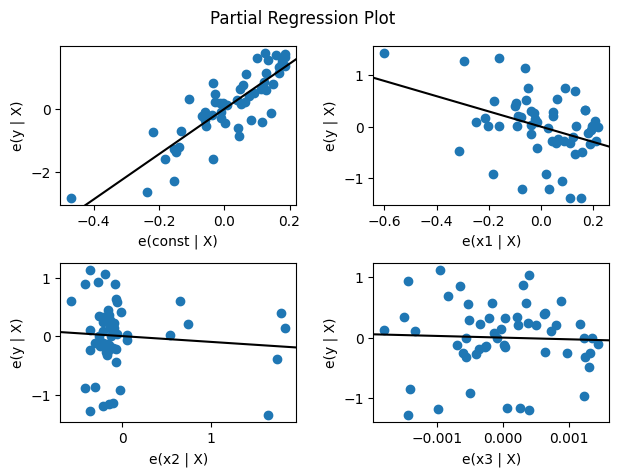

In [35]:
est = sm.GLM(y, X2, family=sm.families.Gaussian(sm.genmod.families.links.inverse_power()))
res = est.fit()
fig = sm.graphics.plot_partregress_grid(res)
fig.tight_layout(pad=1.0)
print("aic=",res.aic)
res.summary()

# Linear regression

## Main class

In [36]:
from itertools import *
import statsmodels.api as sm

class RegressionModel:
    
    def __init__(self, model_name):
        if model_name in ['ols','glm_log', 'glm_inv_pwr']:
            self.model_name = model_name
        else:
            raise Exception('Not a valid model name. model_name should be one of: ols, glm_log, glm_inv_pwr.')
        self.params = []
        self.pvalues = []
        self.scores = []
        self.significant_params = []
    
    def fit(self, df_expr, df_prom, df_cnv, df_snv):
        self.df_expr = df_expr
        self.df_prom = df_prom
        self.df_cnv = df_cnv
        self.df_snv = df_snv
        
        self.gene_count = df_expr.shape[0]
        self.gene_names = df_expr.axes[0].to_numpy()
        for i in range(self.gene_count):
            X = np.array([df_prom.values[i,:],df_cnv.values[i,:],df_snv.values[i,:]]).T
            y = df_expr.values[i,:]

            X2 = sm.add_constant(X)
            est = None
            match self.model_name:
                case 'ols':
                    est = sm.OLS(y, X2)
                case 'glm_log':
                    est = sm.GLM(y, X2, family=sm.families.Gaussian(sm.genmod.families.links.Log())) 
                case 'glm_inv_pwr':
                    est = sm.GLM(y, X2, family=sm.families.Gaussian(sm.genmod.families.links.inverse_power())) 
            
            res = est.fit()
            self.params.append(res.params[1:])
            self.pvalues.append(res.pvalues[1:])
            if self.model_name == 'ols':
                self.scores.append(res.rsquared)
            else:
                self.scores.append(res.pseudo_rsquared())

        self.params = np.array(self.params)
        self.pvalues = np.array(self.pvalues)
        self.scores = np.array(self.scores)
        self.significant_params = np.where(self.pvalues < 0.05, self.params, 0)
        self.__sign_params_mask = self.significant_params != 0
    
    def get_not_fitted_idxs(self, R_indexes=False):
        genes_no_fit = [all(self.__sign_params_mask[i]==[0,0,0]) for i in  range(self.gene_count)]
        genes_idx_no_fit = [i for i, x in enumerate(genes_no_fit) if x] 
        if R_indexes:
            return np.array(genes_idx_no_fit) + 1
        return genes_idx_no_fit

    def get_all_groups(self, drop_not_fitted=True):
        filters = self.__get_filters()
        gene_groups_all = {}
        for filter in filters:
            genes = self.__get_genes_by_mask(filter, self.gene_names)
            filter_name = ''.join(['+' if num==1 else '-' if num==-1 else '0' for num in filter])
            gene_groups_all[filter_name] = genes

        if drop_not_fitted:
            gene_groups_all.pop('000', None)
        return gene_groups_all
        
    def __get_filters(self):
        filters = []
        omics_predictors_count = 3 #prom,cnv,snv
        for i in product([0,-1,1], repeat=omics_predictors_count):
            filters.append(i)
        return np.array(filters)
    
    def __get_genes_by_mask(self, mask, gene_names_list):
        mask_bool=mask.astype(bool)
        group_idxs = []
        for i in  range(self.gene_count):
            if (all(self.__sign_params_mask[i]==mask_bool) and all(self.significant_params[i]*mask>=0)):
                group_idxs.append(i)
        return list(gene_names_list[group_idxs])
    
    def get_not_fitted_dataset(self):
        idxs = np.array(self.get_not_fitted_idxs())
        expr_no_fit = self.df_expr.iloc[idxs, :]
        prom_no_fit = self.df_prom.iloc[idxs, :]
        cnv_no_fit = self.df_cnv.iloc[idxs, :]
        snv_no_fit = self.df_snv.iloc[idxs, :]
        return (expr_no_fit, prom_no_fit, cnv_no_fit, snv_no_fit)


## Write files class

In [37]:
import json
class ResultsWriter:
    def write_not_fitted_idxs(self, not_fitted_idxs):
        #genes no fit indexes for later analysis
        with open(f'{df_name}/no_fit.csv', 'w') as file:
            file.write(','.join(map(str, not_fitted_idxs))) 
            
    def write_grouped_genes(self, gene_groups_all, suffix=''):
        #grouped genes
        with open(f'{df_name}/gene_groups{suffix}.txt', 'w') as convert_file:
            convert_file.write(json.dumps(gene_groups_all, indent=4))

## Merge dicts function

In [38]:
def merge_dicts(dict_1, dict_2):
    dict_3 = {**dict_1, **dict_2}
    for key, value in dict_3.items():
        if key in dict_1 and key in dict_2:
               dict_3[key] = [value , dict_1[key]]
    return dict_3

## Fit LR & Calculate significant parameters

In [39]:
lm = RegressionModel('ols')
lm.fit(df_expr,df_prom,df_cnv,df_snv)
print(lm.params[:5])
print(lm.pvalues[:5])
print(lm.scores[:5])
print(lm.significant_params[:5])

[[-1.48349965e+00 -9.91714907e-02 -2.77729147e+01]
 [-4.66619598e-01  5.73401138e-02  5.50309247e+01]
 [-3.49958071e+00  1.33694418e+00  3.12488537e+00]
 [ 8.93484862e-02  3.09544859e-01 -1.19203743e+02]
 [-2.30134141e+00 -4.82538693e-01  2.93991419e+00]]
[[5.19438036e-03 5.12582266e-01 7.76052221e-01]
 [9.76882403e-02 5.68130846e-01 2.32950782e-01]
 [4.11773061e-02 1.94092676e-01 4.64252769e-01]
 [7.34272939e-01 3.45452755e-01 5.25670298e-01]
 [5.84457986e-04 2.43188891e-01 8.49899740e-02]]
[0.14355974 0.10358031 0.14805683 0.02623226 0.24599187]
[[-1.48349965  0.          0.        ]
 [ 0.          0.          0.        ]
 [-3.49958071  0.          0.        ]
 [ 0.          0.          0.        ]
 [-2.30134141  0.          0.        ]]


## Not fitted genes

In [40]:
len(lm.get_not_fitted_idxs())

1716

## Filter genes

In [41]:
rw = ResultsWriter()

lm_groups = lm.get_all_groups()
all_groups = merge_dicts(all_groups, lm_groups)
print(lm_groups)
rw.write_grouped_genes(lm_groups, suffix='_lm')

{'00-': ['CCDC24', 'PKN2', 'CLCC1', 'MOV10', 'ADAR', 'PEX19', 'ATP1B1', 'IAH1', 'ROCK2', 'ASXL2', 'SNRNP200', 'TTN', 'MEGF10', 'KIAA1191', 'BTN2A2', 'VNN3', 'MYB', 'OPRM1', 'SGCE', 'CREB3L2', 'DCTN3', 'VWA2', 'EXT2', 'FADD', 'PDE3A', 'RND1', 'ACVR1B', 'TRPV4', 'C14orf119', 'MAP3K9', 'EIF2AK4', 'SHC4', 'ARNT2', 'COG7', 'RPGRIP1L', 'C16orf70', 'YWHAE', 'GGNBP2', 'KLHL11', 'SHKBP1', 'ZNF574', 'KIR3DX1', 'GPRASP1', 'ALG13', 'BCORL1', 'GPC4'], '00+': ['MASP2', 'CTSK', 'GNPAT', 'STAT4', 'HTR2B', 'MYD88', 'ROBO2', 'NIT2', 'SLC12A8', 'PPARGC1A', 'CENPE', 'ANKRD50', 'GRM1', 'NOBOX', 'GALNTL5', 'GOT1L1', 'CSMD3', 'IPO7', 'CTR9', 'OVOL1', 'PIWIL4', 'NRXN3', 'CHST6', 'CD68', 'CASKIN2', 'MIB1', 'ZNF24', 'TCF4', 'ZNF556', 'CALR', 'ZNF776', 'DONSON', 'ITSN1', 'PRDX4'], '0-0': ['ANKRD34A', 'SLC38A11', 'HDAC4', 'DGKG', 'GRM8', 'DOK2', 'DIXDC1', 'RXFP2', 'PLA2G4F', 'MYH4', 'SIRPB2', 'KCNG1'], '0--': [], '0-+': [], '0+0': ['NOL9', 'HSPG2', 'NIPAL3', 'SPOCD1', 'MACF1', 'AKR1A1', 'ZRANB2', 'ABCD3', 'SLC44A

# Non linear regression

## Prepare not fitted genes dataset

In [42]:
expr_nlr, prom_nlr, cnv_nlr, snv_nlr = lm.get_not_fitted_dataset()
expr_nlr

,TCGA-AB-2910-03A,TCGA-AB-2871-03A,TCGA-AB-2893-03A,TCGA-AB-2873-03A,TCGA-AB-2936-03A,TCGA-AB-2915-03A,TCGA-AB-2901-03A,TCGA-AB-2885-03A,TCGA-AB-2927-03A,TCGA-AB-2935-03A,TCGA-AB-2919-03A,TCGA-AB-2942-03A,TCGA-AB-2912-03A,TCGA-AB-2934-03A,TCGA-AB-2883-03A,TCGA-AB-2956-03A,TCGA-AB-2939-03A,TCGA-AB-2874-03A,TCGA-AB-2959-03A,TCGA-AB-2937-03A,TCGA-AB-2916-03A,TCGA-AB-2917-03A,TCGA-AB-2872-03A,TCGA-AB-2911-03A,TCGA-AB-2884-03A,...,TCGA-AB-2882-03A,TCGA-AB-2914-03A,TCGA-AB-2890-03A,TCGA-AB-2908-03A,TCGA-AB-2869-03A,TCGA-AB-2924-03A,TCGA-AB-2878-03A,TCGA-AB-2940-03A,TCGA-AB-2938-03A,TCGA-AB-2941-03A,TCGA-AB-2929-03A,TCGA-AB-2921-03A,TCGA-AB-2925-03A,TCGA-AB-2886-03A,TCGA-AB-2880-03A,TCGA-AB-2913-03A,TCGA-AB-2943-03A,TCGA-AB-2881-03A,TCGA-AB-2950-03A,TCGA-AB-2897-03A,TCGA-AB-2895-03A,TCGA-AB-2933-03A,TCGA-AB-2944-03A,TCGA-AB-2877-03A,TCGA-AB-2875-03A
GNB1,14.142107,12.998943,14.354043,13.493480,13.498351,14.074141,13.568312,13.577547,13.432933,13.299351,13.367688,13.657542,13.410716,13.579787,12.238106,13.833977,14.051719,13.498101,13.096386,14.039862,13.271901,13.320801,13.015067,13.069618,13.714568,...,13.876421,13.333295,13.303067,13.612293,13.207319,13.902564,13.907360,13.362766,13.622509,13.872290,13.650266,14.209758,13.659327,13.768391,13.700440,12.773139,13.907736,13.782486,13.760408,12.970106,13.010178,13.373001,13.451340,13.292034,13.989927
RNF207,5.727920,7.357552,7.426265,5.643856,5.754888,6.357552,6.942515,5.523562,6.614710,9.430453,5.954196,4.321928,6.044394,5.392317,7.118941,9.377211,3.584963,6.044394,4.906891,5.727920,5.554589,4.523562,5.321928,7.118941,8.209453,...,8.219169,4.807355,6.247928,6.000000,6.700440,6.857981,6.658211,5.700440,6.714246,9.368506,6.988685,6.149747,6.392317,4.087463,5.832890,4.906891,6.807355,5.554589,5.584963,5.169925,5.672425,3.807355,6.754888,7.087463,5.857981
TAS1R1,5.169925,3.700440,4.392317,5.129283,3.000000,5.491853,3.700440,4.459432,5.285402,4.584963,4.000000,2.807355,3.321928,3.000000,5.209453,3.459432,3.000000,4.523562,3.000000,3.169925,4.087463,3.807355,5.930737,3.459432,5.044394,...,4.857981,4.000000,4.000000,4.523562,4.584963,5.044394,4.392317,3.169925,4.523562,3.906891,3.459432,4.247928,5.491853,3.459432,3.700440,4.247928,4.392317,4.247928,3.459432,7.076816,4.754888,2.000000,3.000000,5.129283,2.321928
DNAJC11,10.740624,10.406205,10.215533,9.935165,10.452241,10.241983,10.267957,10.316282,10.025140,10.246741,10.652845,10.053926,10.091435,10.388017,9.398744,10.579316,9.432542,10.072803,9.861087,10.454299,9.567956,10.167418,10.202124,9.914385,10.435670,...,10.678600,10.166163,10.027906,10.401946,10.483816,10.463524,11.082149,10.615630,10.927778,11.237807,10.337622,10.651949,10.682995,10.726218,10.484823,10.163650,10.802516,10.302639,10.429407,9.874981,10.167418,9.703904,10.176173,10.388017,10.684749
CAMTA1,10.232421,8.625709,10.178665,8.467606,8.774787,8.717676,8.727920,8.467606,9.271463,9.216746,9.113742,9.162391,9.049849,8.829723,8.906891,9.483816,8.388017,8.383704,9.550747,9.252665,8.625709,10.502832,8.625709,9.142107,8.873444,...,8.611025,8.823367,8.829723,9.174926,8.774787,8.864186,10.100662,8.686501,9.339850,9.463524,8.721099,9.440869,9.390169,8.888743,8.665336,8.507795,9.027906,9.108524,9.142107,8.503826,8.661778,9.567956,8.882643,9.044394,8.807355
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
HCFC1,14.193679,13.520496,14.060274,13.188589,13.313875,13.326289,13.572582,13.820777,12.944529,13.159714,13.995326,13.086468,12.970645,12.606405,11.838416,13.406338,13.772418,13.629812,12.715319,13.650154,12.476240,12.696968,13.069953,12.498351,13.619074,...,13.730470,12.701523,13.390303,13.179754,13.690325,13.355213,13.032218,13.772108,13.610679,13.430975,13.784533,13.400613,14.029201,13.826151,13.879009,12.799686,12.903694,13.291315,13.465184,13.076148,13.219622,13.059851,13.225659,13.420881,13.934059
FLNA,17.962529,16.106706,16

## Generalized linear model gauss log link

In [43]:
glm_log = RegressionModel('glm_log')
glm_log.fit(expr_nlr, prom_nlr, cnv_nlr, snv_nlr)
print(glm_log.params[:5])
print(glm_log.pvalues[:5])
print(glm_log.scores[:5])
print(glm_log.significant_params[:5])

glm_log_groups = glm_log.get_all_groups()
all_groups = merge_dicts(all_groups, glm_log_groups)
print(glm_log_groups)
rw.write_grouped_genes(glm_log_groups, suffix='_glm_log')

[[-3.44549020e-02  4.18219354e-03  4.03305635e+00]
 [ 1.55825134e-02  4.90425690e-02 -1.93703718e+01]
 [-8.29319721e-02  3.66657015e-02 -1.83020098e+01]
 [ 2.16077478e-02  1.25480223e-02  8.11708403e+00]
 [-2.74851885e-02 -4.52191367e-03 -2.45794695e+00]]
[[0.09168139 0.56698708 0.23199471]
 [0.70785288 0.31231219 0.51805604]
 [0.48848201 0.53483091 0.64351345]
 [0.15700001 0.14406972 0.14816994]
 [0.74528273 0.73909068 0.74795485]]
[0.10109188 0.02530858 0.01993453 0.11296614 0.00621989]
[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]
{'00-': ['RPTN', 'SCN1A', 'MRPS2', 'GRID1', 'APOA5', 'ATP2A2', 'TSSK4', 'KRT37'], '00+': ['HPCA', 'TTC4', 'B4GALT3', 'PRELP', 'PROS1', 'RHO', 'CHRD', 'SORBS2', 'CSMD1', 'DLC1', 'SLCO5A1', 'SMG1', 'MYH1', 'MZF1'], '0-0': ['NEU2'], '0--': [], '0-+': [], '0+0': ['ZNF436', 'KCND3', 'SH2D2A', 'PLEKHA6', 'KCNH1', 'XIRP2', 'TRPM8', 'SETD5', 'CAMP', 'SHROOM3', 'OPN5', 'GSTA4', 'FOXP2', 'FBP2', 'KIAA1217', 'ADAM12', 'MRGPRX3', 'APLNR', 'RBM4B', 'FAT3

## Not fitted

In [44]:
expr_nlr, prom_nlr, cnv_nlr, snv_nlr = glm_log.get_not_fitted_dataset()
expr_nlr

,TCGA-AB-2910-03A,TCGA-AB-2871-03A,TCGA-AB-2893-03A,TCGA-AB-2873-03A,TCGA-AB-2936-03A,TCGA-AB-2915-03A,TCGA-AB-2901-03A,TCGA-AB-2885-03A,TCGA-AB-2927-03A,TCGA-AB-2935-03A,TCGA-AB-2919-03A,TCGA-AB-2942-03A,TCGA-AB-2912-03A,TCGA-AB-2934-03A,TCGA-AB-2883-03A,TCGA-AB-2956-03A,TCGA-AB-2939-03A,TCGA-AB-2874-03A,TCGA-AB-2959-03A,TCGA-AB-2937-03A,TCGA-AB-2916-03A,TCGA-AB-2917-03A,TCGA-AB-2872-03A,TCGA-AB-2911-03A,TCGA-AB-2884-03A,...,TCGA-AB-2882-03A,TCGA-AB-2914-03A,TCGA-AB-2890-03A,TCGA-AB-2908-03A,TCGA-AB-2869-03A,TCGA-AB-2924-03A,TCGA-AB-2878-03A,TCGA-AB-2940-03A,TCGA-AB-2938-03A,TCGA-AB-2941-03A,TCGA-AB-2929-03A,TCGA-AB-2921-03A,TCGA-AB-2925-03A,TCGA-AB-2886-03A,TCGA-AB-2880-03A,TCGA-AB-2913-03A,TCGA-AB-2943-03A,TCGA-AB-2881-03A,TCGA-AB-2950-03A,TCGA-AB-2897-03A,TCGA-AB-2895-03A,TCGA-AB-2933-03A,TCGA-AB-2944-03A,TCGA-AB-2877-03A,TCGA-AB-2875-03A
GNB1,14.142107,12.998943,14.354043,13.493480,13.498351,14.074141,13.568312,13.577547,13.432933,13.299351,13.367688,13.657542,13.410716,13.579787,12.238106,13.833977,14.051719,13.498101,13.096386,14.039862,13.271901,13.320801,13.015067,13.069618,13.714568,...,13.876421,13.333295,13.303067,13.612293,13.207319,13.902564,13.907360,13.362766,13.622509,13.872290,13.650266,14.209758,13.659327,13.768391,13.700440,12.773139,13.907736,13.782486,13.760408,12.970106,13.010178,13.373001,13.451340,13.292034,13.989927
RNF207,5.727920,7.357552,7.426265,5.643856,5.754888,6.357552,6.942515,5.523562,6.614710,9.430453,5.954196,4.321928,6.044394,5.392317,7.118941,9.377211,3.584963,6.044394,4.906891,5.727920,5.554589,4.523562,5.321928,7.118941,8.209453,...,8.219169,4.807355,6.247928,6.000000,6.700440,6.857981,6.658211,5.700440,6.714246,9.368506,6.988685,6.149747,6.392317,4.087463,5.832890,4.906891,6.807355,5.554589,5.584963,5.169925,5.672425,3.807355,6.754888,7.087463,5.857981
TAS1R1,5.169925,3.700440,4.392317,5.129283,3.000000,5.491853,3.700440,4.459432,5.285402,4.584963,4.000000,2.807355,3.321928,3.000000,5.209453,3.459432,3.000000,4.523562,3.000000,3.169925,4.087463,3.807355,5.930737,3.459432,5.044394,...,4.857981,4.000000,4.000000,4.523562,4.584963,5.044394,4.392317,3.169925,4.523562,3.906891,3.459432,4.247928,5.491853,3.459432,3.700440,4.247928,4.392317,4.247928,3.459432,7.076816,4.754888,2.000000,3.000000,5.129283,2.321928
DNAJC11,10.740624,10.406205,10.215533,9.935165,10.452241,10.241983,10.267957,10.316282,10.025140,10.246741,10.652845,10.053926,10.091435,10.388017,9.398744,10.579316,9.432542,10.072803,9.861087,10.454299,9.567956,10.167418,10.202124,9.914385,10.435670,...,10.678600,10.166163,10.027906,10.401946,10.483816,10.463524,11.082149,10.615630,10.927778,11.237807,10.337622,10.651949,10.682995,10.726218,10.484823,10.163650,10.802516,10.302639,10.429407,9.874981,10.167418,9.703904,10.176173,10.388017,10.684749
CAMTA1,10.232421,8.625709,10.178665,8.467606,8.774787,8.717676,8.727920,8.467606,9.271463,9.216746,9.113742,9.162391,9.049849,8.829723,8.906891,9.483816,8.388017,8.383704,9.550747,9.252665,8.625709,10.502832,8.625709,9.142107,8.873444,...,8.611025,8.823367,8.829723,9.174926,8.774787,8.864186,10.100662,8.686501,9.339850,9.463524,8.721099,9.440869,9.390169,8.888743,8.665336,8.507795,9.027906,9.108524,9.142107,8.503826,8.661778,9.567956,8.882643,9.044394,8.807355
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
HCFC1,14.193679,13.520496,14.060274,13.188589,13.313875,13.326289,13.572582,13.820777,12.944529,13.159714,13.995326,13.086468,12.970645,12.606405,11.838416,13.406338,13.772418,13.629812,12.715319,13.650154,12.476240,12.696968,13.069953,12.498351,13.619074,...,13.730470,12.701523,13.390303,13.179754,13.690325,13.355213,13.032218,13.772108,13.610679,13.430975,13.784533,13.400613,14.029201,13.826151,13.879009,12.799686,12.903694,13.291315,13.465184,13.076148,13.219622,13.059851,13.225659,13.420881,13.934059
FLNA,17.962529,16.106706,16

## Generalized linear model gauss inverse_power link

In [45]:
glm_inv_pwr = RegressionModel('glm_inv_pwr')
glm_inv_pwr.fit(expr_nlr, prom_nlr, cnv_nlr, snv_nlr)
print(glm_inv_pwr.params[:5])
print(glm_inv_pwr.pvalues[:5])
print(glm_inv_pwr.scores[:5])
print(glm_inv_pwr.significant_params[:5])

glm_inv_pwr_groups = glm_inv_pwr.get_all_groups()
all_groups = merge_dicts(all_groups, glm_inv_pwr_groups)
print(glm_inv_pwr_groups)
rw.write_grouped_genes(glm_inv_pwr_groups, suffix='_glm_inv_pwr')

# write all groups
rw.write_grouped_genes(all_groups)

[[ 2.54386987e-03 -3.04986118e-04 -2.95630382e-01]
 [-2.69481553e-03 -7.79890426e-03  3.14819352e+00]
 [ 2.25660862e-02 -8.31348941e-03  4.89283740e+00]
 [-2.05886257e-03 -1.20450434e-03 -7.87215616e-01]
 [ 3.03005635e-03  4.98180044e-04  2.71110602e-01]]
[[0.09177199 0.5684816  0.23643539]
 [0.6820727  0.27978047 0.51168503]
 [0.44718287 0.53787123 0.61728295]
 [0.16961113 0.14163824 0.14934182]
 [0.74682835 0.7425538  0.74915869]]
[0.10058844 0.02607225 0.02087359 0.11170978 0.00617657]
[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]
{'00-': ['GPR78', 'PCDHGA2', 'NIPAL4', 'GLIS3', 'ADAMTSL1', 'NRAP', 'TGM7', 'CSHL1', 'TEX19'], '00+': ['MUC13', 'VCAN', 'EDIL3', 'PCDHA2', 'DMRT2', 'PAH', 'DUOXA2', 'PRM2'], '0-0': ['FBXO6', 'FLG', 'FMO3', 'TMEM163', 'COL3A1', 'MYO1B', 'DCLK3', 'MYL3', 'PTH1R', 'NLGN1', 'SPARCL1', 'NOTCH4', 'ZBTB22', 'COL21A1', 'LPAL2', 'CLIP2', 'SVEP1', 'ITIH5', 'TCERG1L', 'CUL5', 'GRIK4', 'CACNA1C', 'ACADS', 'TEP1', 'SV2B', 'FKBP10', 'MEIS3', 'BRSK1', 'ZNF

## Not fitted

In [46]:
expr_nlr, prom_nlr, cnv_nlr, snv_nlr = glm_inv_pwr.get_not_fitted_dataset()
expr_nlr

,TCGA-AB-2910-03A,TCGA-AB-2871-03A,TCGA-AB-2893-03A,TCGA-AB-2873-03A,TCGA-AB-2936-03A,TCGA-AB-2915-03A,TCGA-AB-2901-03A,TCGA-AB-2885-03A,TCGA-AB-2927-03A,TCGA-AB-2935-03A,TCGA-AB-2919-03A,TCGA-AB-2942-03A,TCGA-AB-2912-03A,TCGA-AB-2934-03A,TCGA-AB-2883-03A,TCGA-AB-2956-03A,TCGA-AB-2939-03A,TCGA-AB-2874-03A,TCGA-AB-2959-03A,TCGA-AB-2937-03A,TCGA-AB-2916-03A,TCGA-AB-2917-03A,TCGA-AB-2872-03A,TCGA-AB-2911-03A,TCGA-AB-2884-03A,...,TCGA-AB-2882-03A,TCGA-AB-2914-03A,TCGA-AB-2890-03A,TCGA-AB-2908-03A,TCGA-AB-2869-03A,TCGA-AB-2924-03A,TCGA-AB-2878-03A,TCGA-AB-2940-03A,TCGA-AB-2938-03A,TCGA-AB-2941-03A,TCGA-AB-2929-03A,TCGA-AB-2921-03A,TCGA-AB-2925-03A,TCGA-AB-2886-03A,TCGA-AB-2880-03A,TCGA-AB-2913-03A,TCGA-AB-2943-03A,TCGA-AB-2881-03A,TCGA-AB-2950-03A,TCGA-AB-2897-03A,TCGA-AB-2895-03A,TCGA-AB-2933-03A,TCGA-AB-2944-03A,TCGA-AB-2877-03A,TCGA-AB-2875-03A
GNB1,14.142107,12.998943,14.354043,13.493480,13.498351,14.074141,13.568312,13.577547,13.432933,13.299351,13.367688,13.657542,13.410716,13.579787,12.238106,13.833977,14.051719,13.498101,13.096386,14.039862,13.271901,13.320801,13.015067,13.069618,13.714568,...,13.876421,13.333295,13.303067,13.612293,13.207319,13.902564,13.907360,13.362766,13.622509,13.872290,13.650266,14.209758,13.659327,13.768391,13.700440,12.773139,13.907736,13.782486,13.760408,12.970106,13.010178,13.373001,13.451340,13.292034,13.989927
RNF207,5.727920,7.357552,7.426265,5.643856,5.754888,6.357552,6.942515,5.523562,6.614710,9.430453,5.954196,4.321928,6.044394,5.392317,7.118941,9.377211,3.584963,6.044394,4.906891,5.727920,5.554589,4.523562,5.321928,7.118941,8.209453,...,8.219169,4.807355,6.247928,6.000000,6.700440,6.857981,6.658211,5.700440,6.714246,9.368506,6.988685,6.149747,6.392317,4.087463,5.832890,4.906891,6.807355,5.554589,5.584963,5.169925,5.672425,3.807355,6.754888,7.087463,5.857981
TAS1R1,5.169925,3.700440,4.392317,5.129283,3.000000,5.491853,3.700440,4.459432,5.285402,4.584963,4.000000,2.807355,3.321928,3.000000,5.209453,3.459432,3.000000,4.523562,3.000000,3.169925,4.087463,3.807355,5.930737,3.459432,5.044394,...,4.857981,4.000000,4.000000,4.523562,4.584963,5.044394,4.392317,3.169925,4.523562,3.906891,3.459432,4.247928,5.491853,3.459432,3.700440,4.247928,4.392317,4.247928,3.459432,7.076816,4.754888,2.000000,3.000000,5.129283,2.321928
DNAJC11,10.740624,10.406205,10.215533,9.935165,10.452241,10.241983,10.267957,10.316282,10.025140,10.246741,10.652845,10.053926,10.091435,10.388017,9.398744,10.579316,9.432542,10.072803,9.861087,10.454299,9.567956,10.167418,10.202124,9.914385,10.435670,...,10.678600,10.166163,10.027906,10.401946,10.483816,10.463524,11.082149,10.615630,10.927778,11.237807,10.337622,10.651949,10.682995,10.726218,10.484823,10.163650,10.802516,10.302639,10.429407,9.874981,10.167418,9.703904,10.176173,10.388017,10.684749
CAMTA1,10.232421,8.625709,10.178665,8.467606,8.774787,8.717676,8.727920,8.467606,9.271463,9.216746,9.113742,9.162391,9.049849,8.829723,8.906891,9.483816,8.388017,8.383704,9.550747,9.252665,8.625709,10.502832,8.625709,9.142107,8.873444,...,8.611025,8.823367,8.829723,9.174926,8.774787,8.864186,10.100662,8.686501,9.339850,9.463524,8.721099,9.440869,9.390169,8.888743,8.665336,8.507795,9.027906,9.108524,9.142107,8.503826,8.661778,9.567956,8.882643,9.044394,8.807355
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
HCFC1,14.193679,13.520496,14.060274,13.188589,13.313875,13.326289,13.572582,13.820777,12.944529,13.159714,13.995326,13.086468,12.970645,12.606405,11.838416,13.406338,13.772418,13.629812,12.715319,13.650154,12.476240,12.696968,13.069953,12.498351,13.619074,...,13.730470,12.701523,13.390303,13.179754,13.690325,13.355213,13.032218,13.772108,13.610679,13.430975,13.784533,13.400613,14.029201,13.826151,13.879009,12.799686,12.903694,13.291315,13.465184,13.076148,13.219622,13.059851,13.225659,13.420881,13.934059
FLNA,17.962529,16.106706,16

In [47]:
# write indexes for R arules
rw.write_not_fitted_idxs(expr_nlr.axes[0].to_numpy())

# Enrichr

## Analyze gene set

In [1]:
import json
import requests


ENRICHR_URL = 'https://maayanlab.cloud/Enrichr/addList'
genes_str = '\n'.join([
    'PHF14', 'RBM3', 'MSL1', 'PHF21A', 'ARL10', 'INSR', 'JADE2', 'P2RX7',
    'LINC00662', 'CCDC101', 'PPM1B', 'KANSL1L', 'CRYZL1', 'ANAPC16', 'TMCC1',
    'CDH8', 'RBM11', 'CNPY2', 'HSPA1L', 'CUL2', 'PLBD2', 'LARP7', 'TECPR2', 
    'ZNF302', 'CUX1', 'MOB2', 'CYTH2', 'SEC22C', 'EIF4E3', 'ROBO2',
    'ADAMTS9-AS2', 'CXXC1', 'LINC01314', 'ATF7', 'ATP5F1'
])
description = 'Example gene list'
payload = {
    'list': (None, genes_str),
    'description': (None, description)
}

response = requests.post(ENRICHR_URL, files=payload)
if not response.ok:
    raise Exception('Error analyzing gene list')

data = json.loads(response.text)
print(data)

{'shortId': 'd9e2ed6a932dd6e6e4219d91cb4120ef', 'userListId': 61018708}


## View added gene set

In [2]:
import json
import requests


ENRICHR_URL = 'https://maayanlab.cloud/Enrichr/view?userListId=%s'
user_list_id = 61018708
response = requests.get(ENRICHR_URL % user_list_id)
if not response.ok:
    raise Exception('Error getting gene list')
    
data = json.loads(response.text)
print(data)

{'genes': ['INSR', 'ARL10', 'HSPA1L', 'CNPY2', 'ATP5F1', 'LARP7', 'MSL1', 'P2RX7', 'PPM1B', 'TMCC1', 'MOB2', 'CRYZL1', 'PHF14', 'PLBD2', 'EIF4E3', 'SEC22C', 'ATF7', 'TECPR2', 'LINC01314', 'CCDC101', 'ANAPC16', 'LINC00662', 'CUL2', 'JADE2', 'CXXC1', 'ADAMTS9-AS2', 'PHF21A', 'ROBO2', 'CDH8', 'RBM3', 'CUX1', 'KANSL1L', 'ZNF302', 'CYTH2', 'RBM11'], 'description': 'Example gene list'}


## Get enrichment results

In [9]:
import json
import requests


ENRICHR_URL = 'https://maayanlab.cloud/Enrichr/enrich'
query_string = '?userListId=%s&backgroundType=%s'
user_list_id = 61018708
gene_set_library = 'SynGO_2022'
response = requests.get(
    ENRICHR_URL + query_string % (user_list_id, gene_set_library)
 )
if not response.ok:
    raise Exception('Error fetching enrichment results')

data = json.loads(response.text)
print(data)

{'SynGO_2022': [[1, 'Synaptic Membrane (GO:0097060) CC', 0.008720202703732128, 146.77205882352942, 696.0096581675563, ['CDH8'], 0.03128634658167845, 0, 0], [2, 'Regulation Of Presynaptic Dense Core Vesicle Exocytosis (GO:0099161) BP', 0.015643173290839224, 73.37132352941177, 305.0574683216414, ['P2RX7'], 0.03128634658167845, 0, 0], [3, 'Regulation Of Synapse Organization (GO:0050807) BP', 0.049559605875515014, 20.942226890756302, 62.922578788316876, ['CDH8'], 0.06607947450068669, 0, 0], [4, 'Postsynapse (GO:0098794) CC', 0.2195111343775915, 4.1649159663865545, 6.315479995147492, ['CYTH2'], 0.2195111343775915, 0, 0]]}


In [6]:
def get_libraries():
    libs_json = json.loads(requests.get('https://maayanlab.cloud/Enrichr/datasetStatistics').text)
    libs = [lib['libraryName']for lib in libs_json['statistics']]
    return libs
get_libraries()

['Genome_Browser_PWMs',
 'TRANSFAC_and_JASPAR_PWMs',
 'Transcription_Factor_PPIs',
 'ChEA_2013',
 'Drug_Perturbations_from_GEO_2014',
 'ENCODE_TF_ChIP-seq_2014',
 'BioCarta_2013',
 'Reactome_2013',
 'WikiPathways_2013',
 'Disease_Signatures_from_GEO_up_2014',
 'KEGG_2013',
 'TF-LOF_Expression_from_GEO',
 'TargetScan_microRNA',
 'PPI_Hub_Proteins',
 'GO_Molecular_Function_2015',
 'GeneSigDB',
 'Chromosome_Location',
 'Human_Gene_Atlas',
 'Mouse_Gene_Atlas',
 'GO_Cellular_Component_2015',
 'GO_Biological_Process_2015',
 'Human_Phenotype_Ontology',
 'Epigenomics_Roadmap_HM_ChIP-seq',
 'KEA_2013',
 'NURSA_Human_Endogenous_Complexome',
 'CORUM',
 'SILAC_Phosphoproteomics',
 'MGI_Mammalian_Phenotype_Level_3',
 'MGI_Mammalian_Phenotype_Level_4',
 'Old_CMAP_up',
 'Old_CMAP_down',
 'OMIM_Disease',
 'OMIM_Expanded',
 'VirusMINT',
 'MSigDB_Computational',
 'MSigDB_Oncogenic_Signatures',
 'Disease_Signatures_from_GEO_down_2014',
 'Virus_Perturbations_from_GEO_up',
 'Virus_Perturbations_from_GEO_do

## GeneTrail2

In [4]:
import json

# Load method definitions
from graviton import *
# Load assignment of samples into groups
from dataGroups import *

# Obtain a session
key = getSession()

# Upload the input data to the server
matrixId = uploadFile(key, 'list.txt')

# Compute scores for the input data and the
# data groups using the shrinkage-t-test
# The first call will only create the job object
# on the server, but will not yet compute anything.
# setupScoring(key, 'independent-shrinkage-t-test',
#   file1 = matrixId,
#   sg = json.dumps(groups['sg']),
#   rg = json.dumps(groups['rg'])
# )

# Run the actual computation
scores = runJob(key)['scores']['id'];

# Create a list of categories for which we
# want to compute our enrichments
categories = [
  '9606-gene-go-biologicalprocess',
  '9606-gene-kegg-pathways',
  '9606-gene-reactome-pathways',
  '9606-gene-pfam-proteinfamilies',
]

# Create and run the job for the enrichment.
# We use the GSEA algorithm here.
setupEnrichment(key, 'gsea', scores, categories)
result = runJob(key)['enrichment']['id']

# Download and store the results
downloadResult(key, result, 'mrnaAllSamples.gsea.zip')

Key is: 2426650d-27d2-41b0-9374-8869af648a81


ValueError: Unexpected status during computation: 'No job is currently registered.'

# Association rules

In [ ]:
!pip install arules

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pandas as pd
import statsmodels as sm

anes96 = sm.datasets.anes96.load_pandas().data
anes96.head()

,popul,TVnews,selfLR,ClinLR,DoleLR,PID,age,educ,income,vote,logpopul
0,0.0,7.0,7.0,1.0,6.0,6.0,36.0,3.0,1.0,1.0,-2.302585
1,190.0,1.0,3.0,3.0,5.0,1.0,20.0,4.0,1.0,0.0,5.247550
2,31.0,7.0,2.0,2.0,6.0,1.0,24.0,6.0,1.0,0.0,3.437208
3,83.0,4.0,3.0,4.0,5.0,1.0,28.0,6.0,1.0,0.0,4.420045
4,640.0,7.0,5.0,6.0,4.0,0.0,68.0,6.0,1.0,0.0,6.461624


## df description 
Number of observations - 944
    Number of variables - 10

    Variables name definitions::

            popul - Census place population in 1000s
            TVnews - Number of times per week that respondent watches TV news.
            PID - Party identification of respondent.
                0 - Strong Democrat
                1 - Weak Democrat
                2 - Independent-Democrat
                3 - Independent-Indpendent
                4 - Independent-Republican
                5 - Weak Republican
                6 - Strong Republican
            age : Age of respondent.
            educ - Education level of respondent
                1 - 1-8 grades
                2 - Some high school
                3 - High school graduate
                4 - Some college
                5 - College degree
                6 - Master's degree
                7 - PhD
            income - Income of household
                1  - None or less than $2,999
                2  - $3,000-$4,999
                3  - $5,000-$6,999
                4  - $7,000-$8,999
                5  - $9,000-$9,999
                6  - $10,000-$10,999
                7  - $11,000-$11,999
                8  - $12,000-$12,999
                9  - $13,000-$13,999
                10 - $14,000-$14.999
                11 - $15,000-$16,999
                12 - $17,000-$19,999
                13 - $20,000-$21,999
                14 - $22,000-$24,999
                15 - $25,000-$29,999
                16 - $30,000-$34,999
                17 - $35,000-$39,999
                18 - $40,000-$44,999
                19 - $45,000-$49,999
                20 - $50,000-$59,999
                21 - $60,000-$74,999
                22 - $75,000-89,999
                23 - $90,000-$104,999
                24 - $105,000 and over
            vote - Expected vote
                0 - Clinton
                1 - Dole
            The following 3 variables all take the values:
                1 - Extremely liberal
                2 - Liberal
                3 - Slightly liberal
                4 - Moderate
                5 - Slightly conservative
                6 - Conservative
                7 - Extremely Conservative
            selfLR - Respondent's self-reported political leanings from "Left"
                to "Right".
            ClinLR - Respondents impression of Bill Clinton's political
                leanings from "Left" to "Right".
            DoleLR  - Respondents impression of Bob Dole's political leanings
                from "Left" to "Right".
            logpopul - log(popul + .1)


##example

In [ ]:
import arules as ar
from arules.utils import five_quantile_based_bins, top_bottom_10, top_5_variant_variables

# X = np.array([df_expr.values[0,:],df_prom.values[0,:],df_cnv.values[0,:],df_snv.values[0,:]]).T
# y = df_expr.values[0,:]

rules, supp_dict = ar.create_association_rules(anes96,max_cols=2,binning_method=five_quantile_based_bins)

/usr/local/lib/python3.9/dist-packages/arules/utils/binning.py:88: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  attached_series = binned_series.append(na_series).reindex(series.index)
/usr/local/lib/python3.9/dist-packages/arules/utils/binning.py:88: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  attached_series = binned_series.append(na_series).reindex(series.index)
/usr/local/lib/python3.9/dist-packages/arules/utils/binning.py:88: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  attached_series = binned_series.append(na_series).reindex(series.index)


Calculating all relevant supports
100%|██████████| 66/66 [00:00<00:00, 350.78it/s]

Calculating all feature level rules per variable level rule
100%|██████████| 110/110 [00:00<00:00, 198.42it/s]
Overall # of Rules:  2638


In [ ]:
rules

,antecedent,consequent,rule print,ant_count,con_count,rule_count,ant_supp,con_supp,rule_supp,confidence,lift,# of all records
0,{'popul': '(40.0 - 170.0]'},{'logpopul': '(4.0 - 5.0]'},popul=(40.0 - 170.0] ==> logpopul=(4.0 - 5.0],179,179,179,0.189619,0.189619,0.189619,1.0000,5.2737,944
1,{'logpopul': '(4.0 - 5.0]'},{'popul': '(40.0 - 170.0]'},logpopul=(4.0 - 5.0] ==> popul=(40.0 - 170.0],179,179,179,0.189619,0.189619,0.189619,1.0000,5.2737,944
2,{'popul': '(170.0 - 7300.0]'},{'logpopul': '(5.0 - 9.0]'},popul=(170.0 - 7300.0] ==> logpopul=(5.0 - 9.0],189,189,189,0.200212,0.200212,0.200212,1.0000,4.9947,944
3,{'logpopul': '(5.0 - 9.0]'},{'popul': '(170.0 - 7300.0]'},logpopul=(5.0 - 9.0] ==> popul=(170.0 - 7300.0],189,189,189,0.200212,0.200212,0.200212,1.0000,4.9947,944
4,{'popul': '(11.0 - 40.0]'},{'logpopul': '(2.0 - 4.0]'},popul=(11.0 - 40.0] ==> logpopul=(2.0 - 4.0],193,193,193,0.204449,0.204449,0.204449,1.0000,4.8912,944
...,...,...,...,...,...,...,...,...,...,...,...,...
2633,{'vote': '0.0'},{'ClinLR': '1.0'},vote=0.0 ==> ClinLR=1.0,551,109,15,0.583686,0.115466,0.015890,0.0272,0.2358,944
2634,{'selfLR': '3.0'},{'vote': '1.0'},selfLR=3.0 ==> vote=1.0,147,393,11,0.155720,0.416314,0.011653,0.0748,0.1797,944
2635,{'vote': '1.0'},{'selfLR': '3.0'},vote=1.0 ==> selfLR=3.0,393,147,11,0.416314,0.155720,0.011653,0.0280,0.1797,944
2636,{'PID': '1.0'},{'vote': '1.0'},PID=1.0 ==> vote=1.0,180,393,11,0.190678,0.416314,0.011653,0.0611,0.1468,944


PID


/usr/local/lib/python3.9/dist-packages/numpy/core/fromnumeric.py:3613: FutureWarning: The operation <function std at 0x7fc7ec7eb430> failed on a column. If any error is raised, this will raise an exception in a future version of pandas. Drop these columns to avoid this warning.
  return std(axis=axis, dtype=dtype, out=out, ddof=ddof, **kwargs)
/usr/local/lib/python3.9/dist-packages/numpy/core/fromnumeric.py:3613: FutureWarning: The operation <function std at 0x7fc7ec7eb430> failed on a column. If any error is raised, this will raise an exception in a future version of pandas. Drop these columns to avoid this warning.
  return std(axis=axis, dtype=dtype, out=out, ddof=ddof, **kwargs)
/usr/local/lib/python3.9/dist-packages/numpy/core/fromnumeric.py:3613: FutureWarning: The operation <function std at 0x7fc7ec7eb430> failed on a column. If any error is raised, this will raise an exception in a future version of pandas. Drop these columns to avoid this warning.
  return std(axis=axis, dtype

,rule print,ant_supp,con_supp,rule_supp,confidence,lift
0,PID=6.0 ==> vote=1.0,0.185381,0.416314,0.176907,0.9543,2.2922
3,PID=5.0 ==> vote=1.0,0.158898,0.416314,0.131356,0.8267,1.9857
4,PID=4.0 ==> vote=1.0,0.099576,0.416314,0.074153,0.7447,1.7887
47,PID=3.0 ==> vote=1.0,0.039195,0.416314,0.011653,0.2973,0.7141
59,PID=1.0 ==> vote=1.0,0.190678,0.416314,0.011653,0.0611,0.1468


/usr/local/lib/python3.9/dist-packages/arules/association_rules.py:404: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes.set_xticklabels(labs_x)


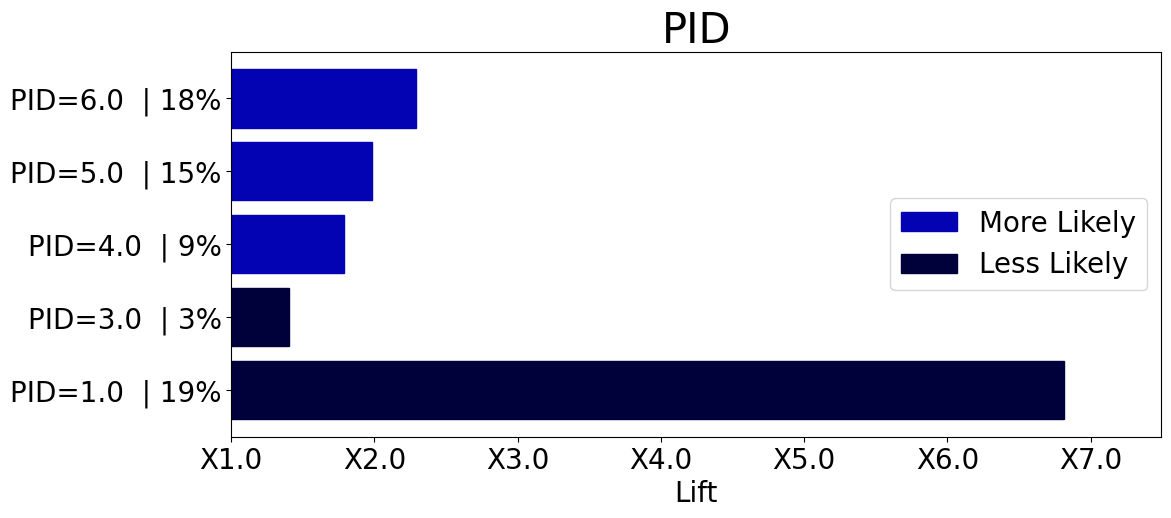

selfLR


,rule print,ant_supp,con_supp,rule_supp,confidence,lift
2,selfLR=6.0 ==> vote=1.0,0.230932,0.416314,0.193856,0.8394,2.0164
5,selfLR=7.0 ==> vote=1.0,0.036017,0.416314,0.026483,0.7353,1.7662
10,selfLR=5.0 ==> vote=1.0,0.180085,0.416314,0.102754,0.5706,1.3706
51,selfLR=4.0 ==> vote=1.0,0.271186,0.416314,0.077331,0.2852,0.6850
58,selfLR=3.0 ==> vote=1.0,0.155720,0.416314,0.011653,0.0748,0.1797


/usr/local/lib/python3.9/dist-packages/arules/association_rules.py:404: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes.set_xticklabels(labs_x)


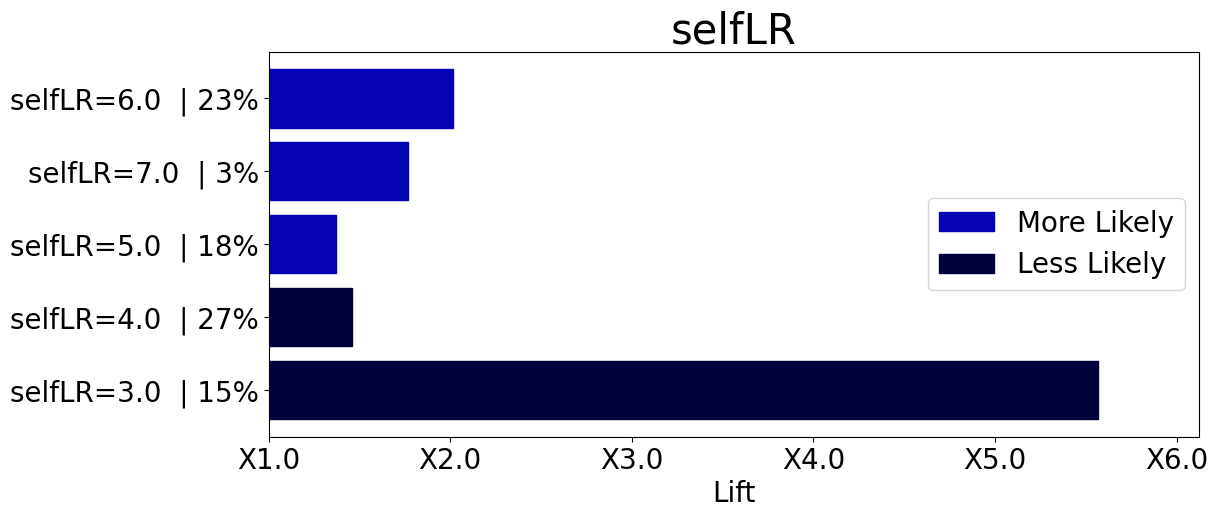

ClinLR


,rule print,ant_supp,con_supp,rule_supp,confidence,lift
1,ClinLR=1.0 ==> vote=1.0,0.115466,0.416314,0.099576,0.8624,2.0715
7,ClinLR=2.0 ==> vote=1.0,0.335805,0.416314,0.202331,0.6025,1.4473
48,ClinLR=3.0 ==> vote=1.0,0.250000,0.416314,0.073093,0.2924,0.7023
55,ClinLR=5.0 ==> vote=1.0,0.070975,0.416314,0.011653,0.1642,0.3944
56,ClinLR=4.0 ==> vote=1.0,0.169492,0.416314,0.027542,0.1625,0.3903


/usr/local/lib/python3.9/dist-packages/arules/association_rules.py:404: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes.set_xticklabels(labs_x)


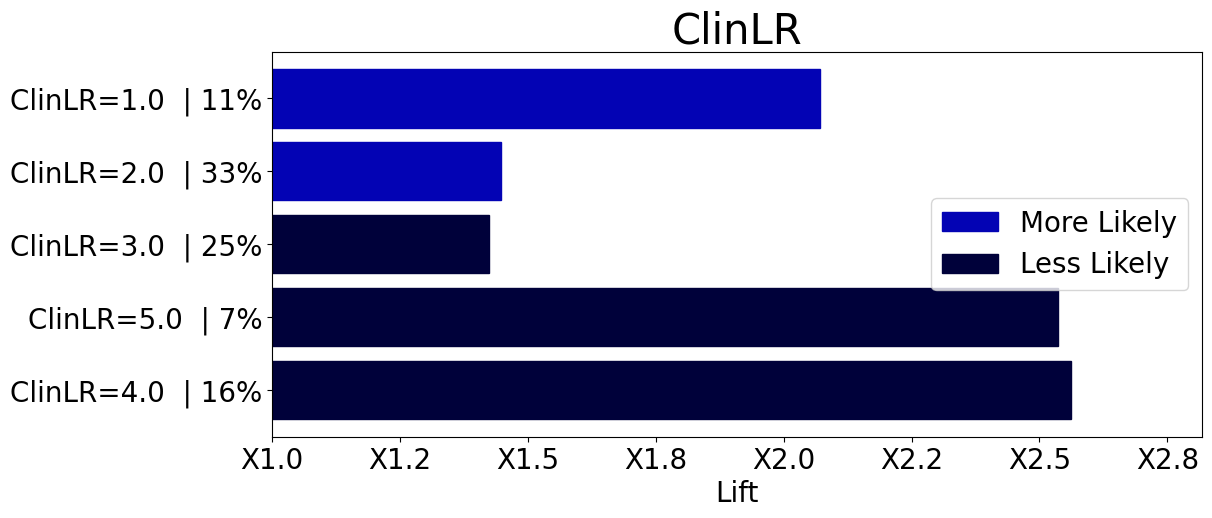

DoleLR


,rule print,ant_supp,con_supp,rule_supp,confidence,lift
6,DoleLR=5.0 ==> vote=1.0,0.206568,0.416314,0.128178,0.6205,1.4905
22,DoleLR=6.0 ==> vote=1.0,0.487288,0.416314,0.224576,0.4609,1.1070
39,DoleLR=4.0 ==> vote=1.0,0.092161,0.416314,0.033898,0.3678,0.8835
53,DoleLR=3.0 ==> vote=1.0,0.045551,0.416314,0.012712,0.2791,0.6703
57,DoleLR=7.0 ==> vote=1.0,0.121822,0.416314,0.012712,0.1043,0.2506


/usr/local/lib/python3.9/dist-packages/arules/association_rules.py:404: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes.set_xticklabels(labs_x)


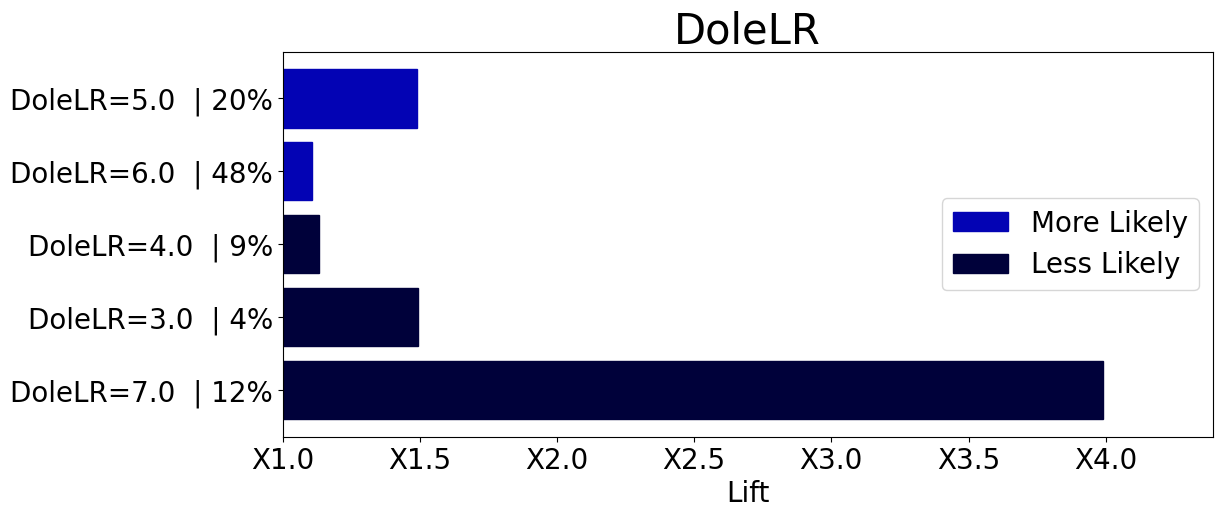

popul


,rule print,ant_supp,con_supp,rule_supp,confidence,lift
14,popul=[0.0 - 11.0] ==> vote=1.0,0.405720,0.416314,0.199153,0.4909,1.1791
25,popul=(11.0 - 40.0] ==> vote=1.0,0.204449,0.416314,0.093220,0.4560,1.0952
41,popul=(40.0 - 170.0] ==> vote=1.0,0.189619,0.416314,0.065678,0.3464,0.8320
49,popul=(170.0 - 7300.0] ==> vote=1.0,0.200212,0.416314,0.058263,0.2910,0.6990


/usr/local/lib/python3.9/dist-packages/arules/association_rules.py:404: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes.set_xticklabels(labs_x)


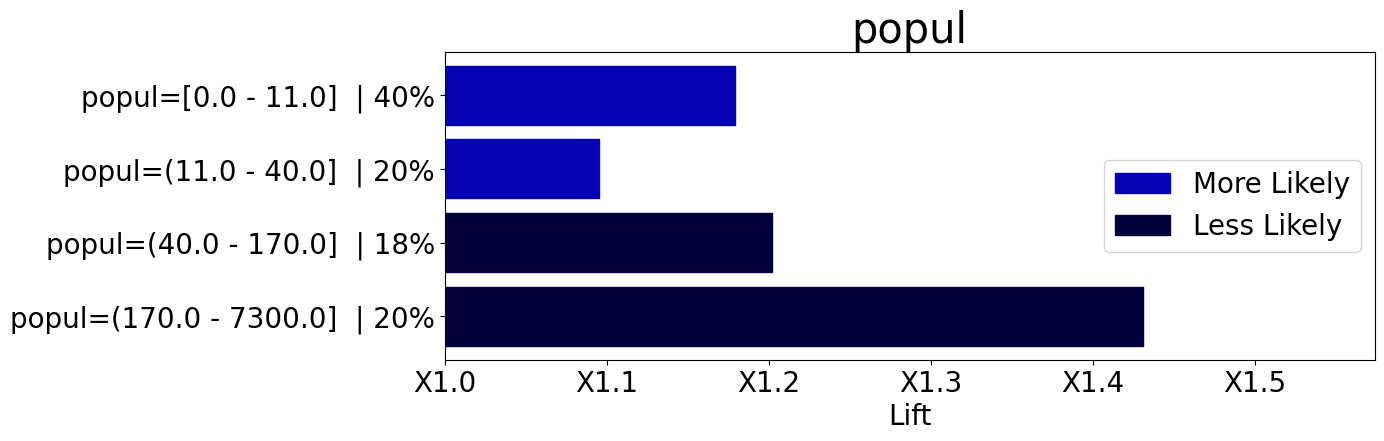

In [ ]:
ar.present_rules_per_consequent(rules,consequent={'vote':'1.0'},
                                selection_function=top_5_variant_variables, drop_dups=True,
                                plot=True)



In [ ]:
ar.utils.selection

In [ ]:
!pip show arules

Name: arules
Version: 0.0.0
Summary: multi-purpose association rules analysis
Home-page: https://github.com/windward-ltd/arules
Author: Abir Koren
Author-email: abir@wnwd.com
License: MIT
Location: /usr/local/lib/python3.9/dist-packages
Requires: numpy, pandas
Required-by: 


# Other tries in nlm

## Polynomial

In [60]:
# gene_idx=7
# degree=2
# # X = np.array([prom_nlr.values[gene_idx,:],cnv_nlr.values[gene_idx,:],snv_nlr.values[gene_idx,:]]).T
# # y = expr_nlr.values[gene_idx,:]
# X = np.array([df_prom.values[gene_idx,:],df_cnv.values[gene_idx,:],df_snv.values[gene_idx,:]]).T
# y = df_expr.values[gene_idx,:]
# poly = PolynomialFeatures(degree, interaction_only=False)
# tmp_X = poly.fit_transform(X)
# print(poly.get_feature_names_out())
# model = sm.OLS(y,tmp_X)
# res = model.fit()
# print(res.summary())
# print(y)
# print(res.predict(tmp_X))

In [61]:
# from sklearn.model_selection import train_test_split
# from sklearn.preprocessing import PolynomialFeatures
# from sklearn.linear_model import LassoCV
# from sklearn.pipeline import make_pipeline

# nlr_params = []
# nlr_pvalues = []
# nlr_scores = []
# degree = 3


# for i in range(gene_count):
#         X = np.array([prom_nlr.values[i,:],cnv_nlr.values[i,:],snv_nlr.values[i,:]]).T
#         y = expr_nlr.values[i,:]

#         poly = PolynomialFeatures(degree, interaction_only=False) 
#         tmp_X = poly.fit_transform(X)
        
#         model = sm.OLS(y,tmp_X)
#         res = model.fit()

#         nlr_params.append(res.params[1:])
#         nlr_pvalues.append(res.pvalues[1:])
#         nlr_scores.append(res.rsquared)
        
#     # print(res.summary())
#     # print(res.pvalues)
    
# nlr_params = np.array(nlr_params)
# nlr_pvalues = np.array(nlr_pvalues)
# nlr_significant_params = np.where(nlr_pvalues < 0.05, nlr_params, 0)
# print(nlr_params[:5])
# print(nlr_pvalues[:5])
# print(nlr_scores[:5])
# print(nlr_significant_params[:5])

## SVR

[9.54358309 8.97279975 9.09669875 8.94548366 8.84871517 9.00512262
 8.73609474 8.7996544  8.8814772  9.1532784  8.7306796  8.92248301
 8.86538606 8.79981072 9.2788178  9.00912448 8.85129293 8.7591793
 8.79627271 8.96864617 8.88434258 8.90095676 9.20767345 8.88412016
 8.76056621 8.88557946 8.99412606 8.96585668 8.8078634  8.73041887
 8.95607185 8.98740065 8.8336485  9.2060361  8.89786398 9.03583226
 9.21621181 8.97944921 9.18339002 9.17486733 8.97062906 8.80945525
 9.25445831 9.03725144 8.79204497 8.77136032 9.17031172 8.97079185
 8.96801196 8.70797677 8.84931572 8.78345891 8.74363498 8.7607615
 9.06727934]
[10.35314683  8.48784003 10.25266543  9.00842862  8.6794801   9.42626475
  8.62570884  8.72451385  9.45121111  9.41151099  8.85486838  8.89481776
  7.86418614  9.60547952  8.45121111 10.05256805  8.88874325  8.41785251
  7.53915881  9.06877828  7.99435344  7.70043972  9.00562455  8.59618976
  9.24792751  9.19229281  9.11113567  8.96000193  8.59245704  9.02513956
  9.19721669  7.70735

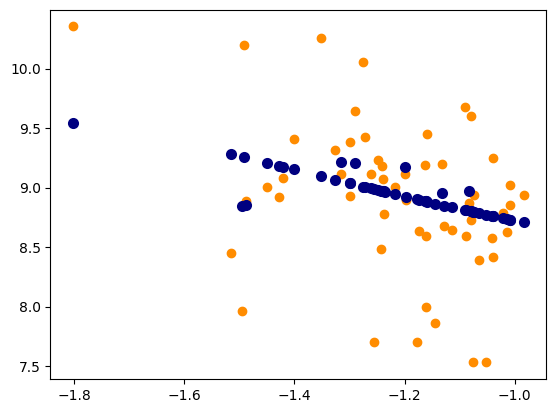

In [62]:
from sklearn.svm import SVR
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import ShuffleSplit

svr = SVR(kernel='rbf')
svr.fit(X, y)
y_pred = svr.predict(X)
print(y_pred)
print(y)
print(svr.score(X,y))
# print(svr.coef_);
cv = ShuffleSplit(n_splits=5, test_size=0.1, random_state=0)
print(np.mean(cross_val_score(svr, X, y, cv=cv)))
plt.scatter(X[:,0], y, color='darkorange', label='data')
plt.scatter(X[:,0], y_pred, color='navy', lw=2, label='RBF model')